In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
try:
    with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
        zip_ref.extractall('/content')
        zip_ref.close()
    print("Extraction successful!")
except zipfile.BadZipFile:
    print("Bad ZIP file error!")

Bad ZIP file error!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',# cats =0, dogs=1
    batch_size=32,
    image_size=(256,256)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',# cats =0, dogs=1
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

# we store images in the form of numpy and numpy stores values between 0 and 255 to store value
#  in between 0 and 1 pixels values we doing the following function
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)# divide the image by 255 and return it
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
# create CNN Model
model=Sequential()
# filters = 32
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# filters = 64
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# filters = 128
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))# 128 neurons
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))# 64 neurons
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))#output

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 70s 106ms/step - loss: 1.2744 - accuracy: 0.6075 - val_loss: 1.0921 - val_accuracy: 0.6060
Epoch 2/2
625/625 [==============================] - 68s 108ms/step - loss: 0.5898 - accuracy: 0.6964 - val_loss: 0.6460 - val_accuracy: 0.6766


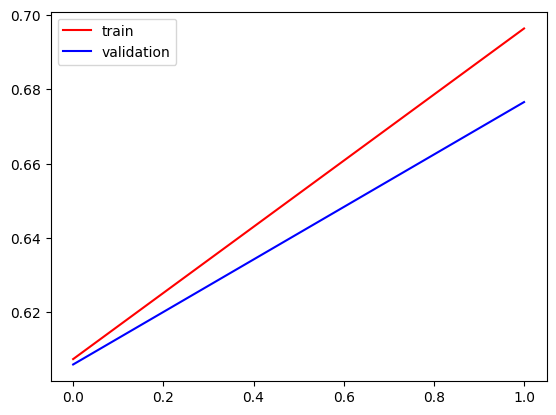

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

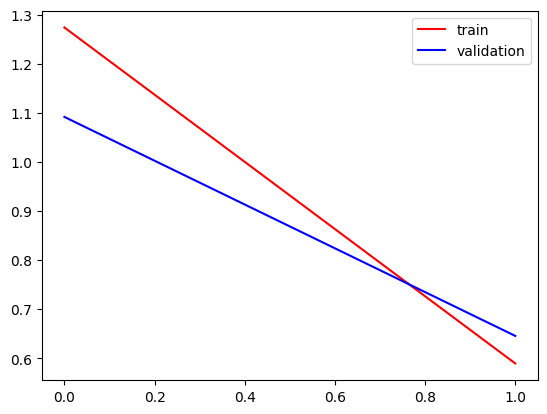

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

here overfittings is happening ,
overfitting=showing good results on train data but not on test data ,
big gap between training and test

In [ ]:
# Method to reduce OverFitting
# add more data
# data augmentation -> more data is created with the existing data
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity
# we will add batch normalization and dropout

In [ ]:
import cv2
test_img = cv2.imread('/content/cat.jpeg')

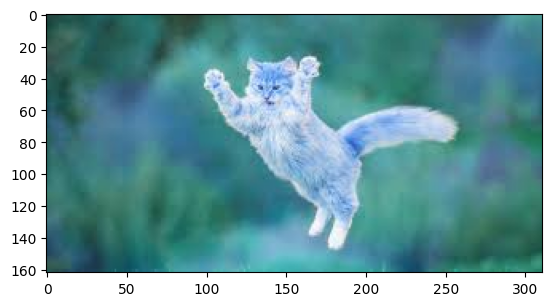

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(162, 311, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 277ms/step


array([[0.]], dtype=float32)